# Lab4

### Regularyzacja dla regresji liniowej

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report
from sklearn.datasets import load_iris, load_digits
import math
import csv

In [2]:
with open("lin_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 1].T
    x = data[:, 0].T

x.shape = (-1, 1)
y.shape = (-1, 1)

In [3]:
with open("lin_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y_test = data[:, 1].T
    x_test_pre = data[:, 0].T

x_test_pre.shape = (-1, 1)
y_test.shape = (-1, 1)

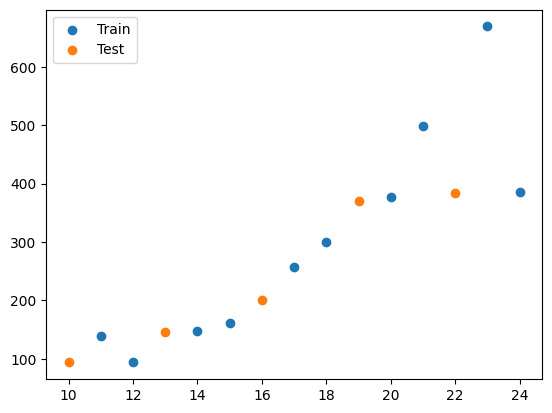

In [4]:
plt.scatter(x, y)
plt.scatter(x_test_pre, y_test)
plt.legend(["Train", "Test"])
plt.show()

In [5]:
X_train_pre = x
y_train = y

standard_scaler = StandardScaler()

X_train_pre_scaled = standard_scaler.fit_transform(X_train_pre)
X_test = standard_scaler.transform(x_test_pre)

In [6]:
poly_features = PolynomialFeatures(degree=6)
X_train = poly_features.fit_transform(X_train_pre_scaled)
X_test = poly_features.transform(X_test)

In [7]:
def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta):
    return ((h_fun(X, theta) - y) ** 2).sum() / (2 * X.shape[1])

def multivariable_linear_regression(X, y, theta, epsilon, learning_rate):
    prev_cost = 0
    cost = calculate_cost(X, y, theta)
    m = X.shape[1]

    while abs(cost - prev_cost) > epsilon:
        prev_cost = cost
        temp = h_fun(X, theta)
        h_y_diff = (temp - y)
        gradient = h_y_diff @ X.T
        theta = theta - learning_rate * (gradient.T / m)
        cost = calculate_cost(X, y, theta)

    return theta

In [8]:
theta = np.zeros((7, 1))
eps = 1e-10
alpha = 0.01

theta = multivariable_linear_regression(X_train.T, y_train.T, theta, eps, alpha)

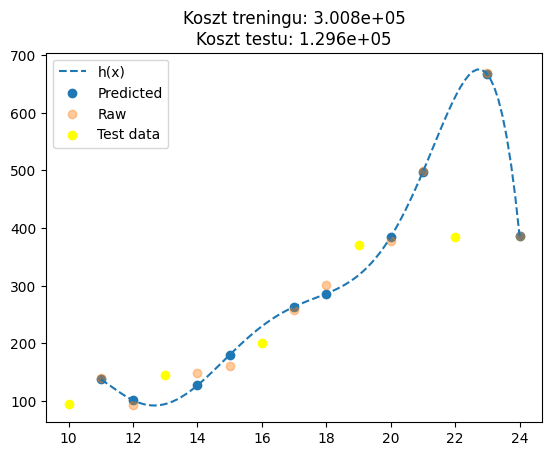

In [9]:
t = np.linspace(x.min(), x.max(), 100, endpoint=True)
t = t.reshape((len(t), 1))
t = standard_scaler.transform(t)

t_poly = poly_features.transform(t)
t_plot = h_fun(t_poly.T, theta)
t = standard_scaler.inverse_transform(t)

plt.plot(t, t_plot.T, "--")
plt.scatter(standard_scaler.inverse_transform(X_train)[:, 1], h_fun(X_train.T, theta).T)
plt.scatter(x, y, alpha=0.4)
plt.scatter(x_test_pre, y_test, color='yellow')
plt.legend(["h(x)", "Predicted", "Raw", "Test data"])
plt.title(f"Koszt treningu: {calculate_cost(X_train.T, y_train, theta):.4}\nKoszt testu: {calculate_cost(X_test.T, y_test, theta):.4}")
plt.show()

In [10]:
def calculate_cost2(X, y, theta, lambda_):
    m = X.shape[1]
    lin_reg_cost = ((h_fun(X, theta) - y) ** 2).sum() / (2 * m)
    sum_of_thetas = (theta[1:, :] ** 2).sum()

    return lin_reg_cost + sum_of_thetas * lambda_ / (2 * m)


def multivariable_linear_regression2(X, y, theta, epsilon, learning_rate, lambda_):
    prev_cost = 0
    cost = calculate_cost(X, y, theta)
    m = X.shape[1]

    while abs(cost - prev_cost) > epsilon:
        prev_cost = cost
        temp = h_fun(X, theta)
        h_y_diff = (temp - y)
        gradients = h_y_diff @ X.T
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :].T], axis=1)
        theta = theta - (learning_rate * (gradients + lambda_ * theta_reg) / m).T
        cost = calculate_cost(X, y, theta)

    return theta

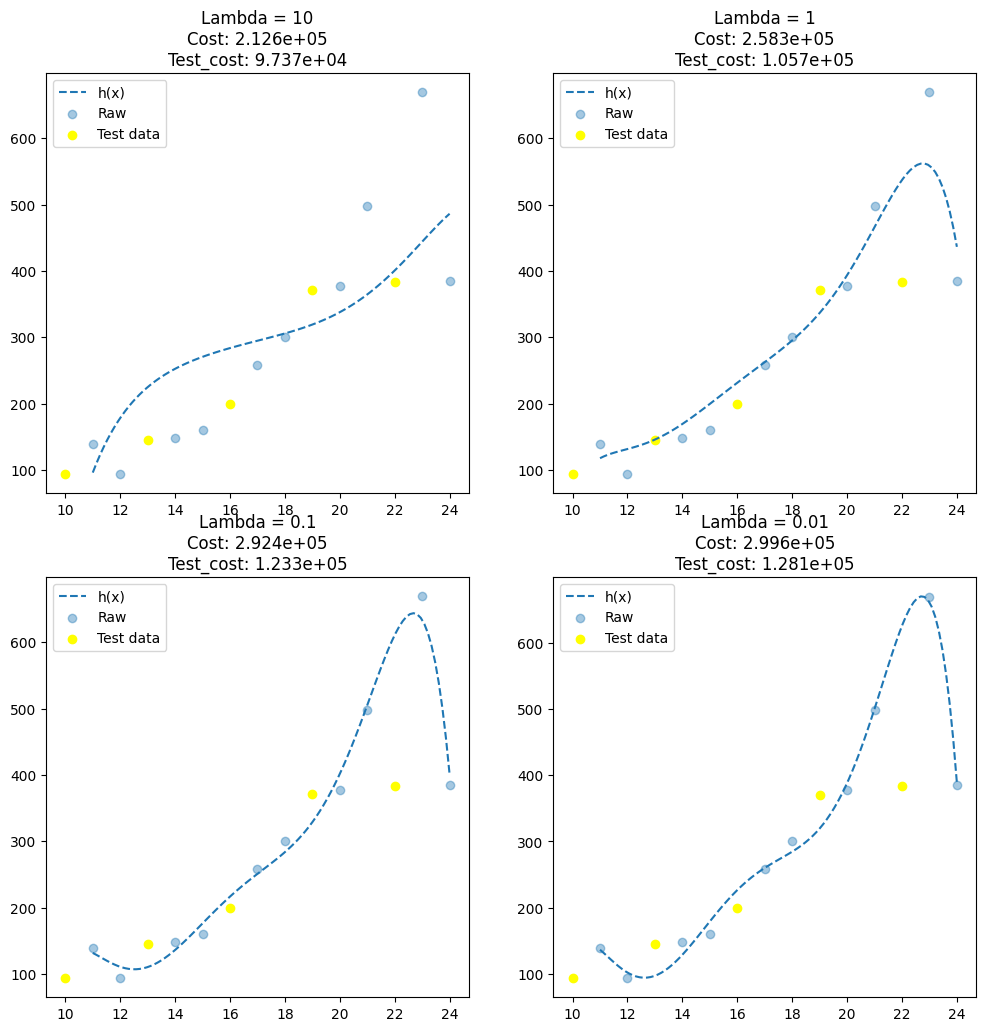

In [11]:
lambdas_ = [10, 1, 0.1, 0.01]
eps = 1e-10
alpha = 0.01

fig, ax = plt.subplots(2, 2)
fig.set_size_inches((12, 12))

for i in range(4):
    lambda_ = lambdas_[i]
    theta = np.zeros((7, 1))
    theta = multivariable_linear_regression2(X_train.T, y_train.T, theta, eps, alpha, lambda_)

    t = np.linspace(x.min(), x.max(), 100, endpoint=True)
    t = t.reshape((len(t), 1))
    t = standard_scaler.transform(t)

    t_poly = poly_features.transform(t)
    t_plot = h_fun(t_poly.T, theta)
    t = standard_scaler.inverse_transform(t)

    ax[int(i / 2), i % 2].plot(t, t_plot.T, "--")
    ax[int(i / 2), i % 2].scatter(x, y, alpha=0.4)
    ax[int(i / 2), i % 2].scatter(x_test_pre, y_test, color='yellow')
    ax[int(i / 2), i % 2].legend(["h(x)", "Raw", "Test data"])
    ax[int(i / 2), i % 2].set_title(f"Lambda = {lambda_}\nCost: {calculate_cost2(X_train.T, y_train, theta, lambda_):.4}"
                                    f"\nTest_cost: {calculate_cost2(X_test.T, y_test, theta, lambda_):.4}")

plt.show()

### Regularyzacja dla regresji logistycznej

In [12]:
with open("logi_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y_train_pre = data[:, 2].T
    x_train_pre = data[:, 0:2].T

with open("logi_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y_test_pre = data[:, 2].T
    x_test_pre = data[:, 0:2].T


(n, m) = x_train_pre.shape
x_train_pre = x_train_pre.reshape((m, n))
y_train_pre.shape = (-1, 1)
(n, m) = x_test_pre.shape
x_test_pre = x_test_pre.reshape((m, n))
y_test_pre.shape = (-1, 1)

standard_scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=3)

# X_train = standard_scaler.fit_transform(x_train_pre)
# X_test = standard_scaler.transform(x_test_pre)

# X_train = poly_features.fit_transform(x_train_pre)
# X_test = poly_features.transform(x_test_pre)

X_train = x_train_pre
X_test = x_test_pre
y_train = y_train_pre
y_test = y_test_pre

X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

In [13]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h


def calculate_cost(X, y, theta, lambda_):
    m = X.shape[1]
    h = h_fun(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1 - y) * np.log(1 - h)

    lin_reg_cost = (y_1 + y_0).sum() / m
    sum_of_thetas = (theta[1:, :] ** 2).sum()

    return lin_reg_cost + sum_of_thetas * lambda_ / (2 * m)


def logistic_regression(X, y, theta, epsilon, learning_rate, lambda_):
    prev_cost = 0
    cost = calculate_cost(X, y, theta, lambda_)
    m = X.shape[1]

    while abs(cost - prev_cost) > epsilon:
        prev_cost = cost
        h_y_diff = (h_fun(X, theta) - y)
        gradients = h_y_diff @ X.T

        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :].T], axis=1)
        theta = theta - (learning_rate * (gradients + lambda_ * theta_reg) / m).T

        cost = calculate_cost(X, y, theta, lambda_)

    return theta

In [14]:
def if_belongs(X, theta):
    belongs = [[], []]
    not_belongs = [[], []]

    for index in range(X.shape[1]):
        if h_fun(X[:, index], theta) >= 0.5:
            belongs[0].append(X[1, index])
            belongs[1].append(X[2, index])
        else:
            not_belongs[0].append(X[1, index])
            not_belongs[1].append(X[2, index])

    return np.array(belongs), np.array(not_belongs)

In [15]:
theta = np.zeros((X_train.shape[1], 1))
eps = 1e-10
alpha = 1e-2
lambda_ = 0

theta = logistic_regression(X_train.T, y_train.T, theta, eps, alpha, lambda_)

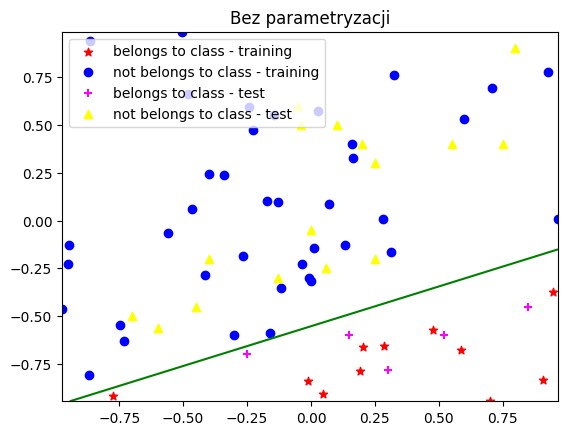

In [16]:
belongs, not_belongs = if_belongs(X_train.T, theta)
plt.scatter(belongs[0, :], belongs[1, :], marker='*', color='r')
plt.scatter(not_belongs[0, :], not_belongs[1, :], marker='o', color='b')

belongs, not_belongs = if_belongs(X_test.T, theta)
plt.scatter(belongs[0, :], belongs[1, :], marker='+', color='magenta')
plt.scatter(not_belongs[0, :], not_belongs[1, :], marker='^', color='yellow')

x1 = x_train_pre[:, 0]
x2 = x_train_pre[:, 1]
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = points
x1x2_range_comb = np.concatenate([np.ones((x1x2_range_comb.shape[0], 1)), x1x2_range_comb], axis=1)
X_range_comb = x1x2_range_comb.T
h_range_comb = h_fun(X_range_comb, theta)
h_range_comb.shape = x1x1.shape
plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')


plt.legend(["belongs to class - training", "not belongs to class - training", "belongs to class - test", "not belongs to class - test"])
plt.title("Bez parametryzacji")
plt.show()

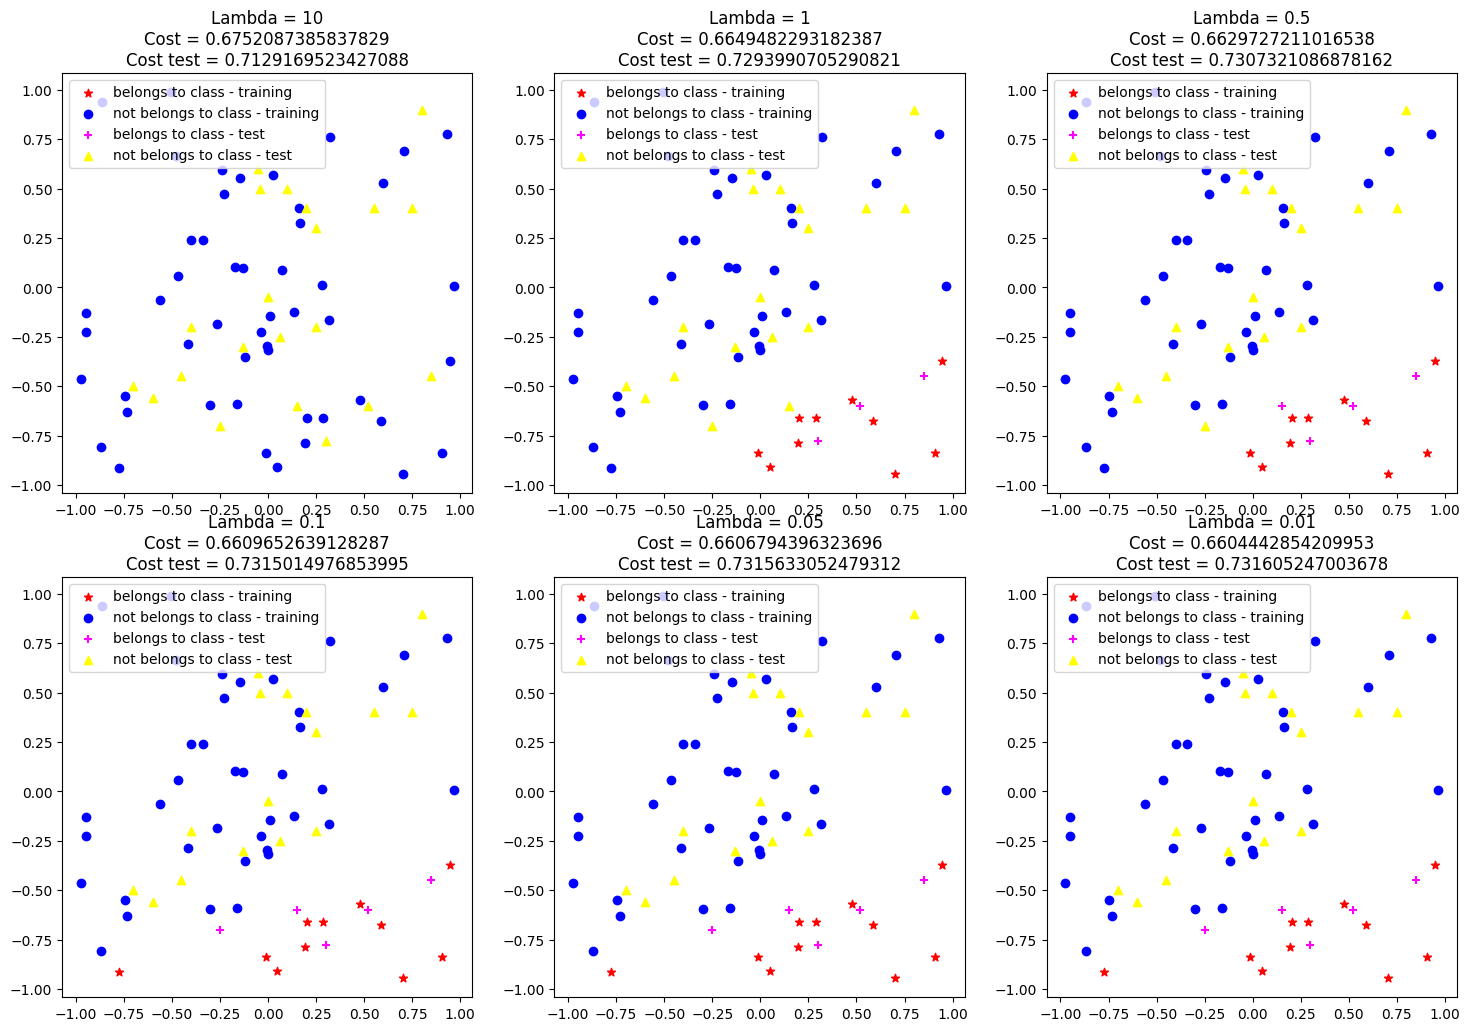

In [17]:
lambdas_ = [10, 1, 0.5, 0.1, 0.05, 0.01]
eps = 1e-10
alpha = 1e-2

fig, ax = plt.subplots(2, 3)
fig.set_size_inches((18, 12))

for i in range(6):
    lambda_ = lambdas_[i]
    theta = np.zeros((X_train.shape[1], 1))
    theta = logistic_regression(X_train.T, y_train.T, theta, eps, alpha, lambda_)

    belongs, not_belongs = if_belongs(X_train.T, theta)
    ax[int(i / 3), i % 3].scatter(belongs[0, :], belongs[1, :], marker='*', color='r')
    ax[int(i / 3), i % 3].scatter(not_belongs[0, :], not_belongs[1, :], marker='o', color='b')

    belongs, not_belongs = if_belongs(X_test.T, theta)
    ax[int(i / 3), i % 3].scatter(belongs[0, :], belongs[1, :], marker='+', color='magenta')
    ax[int(i / 3), i % 3].scatter(not_belongs[0, :], not_belongs[1, :], marker='^', color='yellow')

    ax[int(i / 3), i % 3].legend(["belongs to class - training", "not belongs to class - training", "belongs to class - test", "not belongs to class - test"])
    ax[int(i / 3), i % 3].set_title(f"Lambda = {lambda_}\nCost = {calculate_cost(X_train.T, y_train.T, theta, lambda_)}\n"
                                    f"Cost test = {calculate_cost(X_test.T, y_test.T, theta, lambda_)}")

plt.show()

### Klasa LogisticRegression

In [18]:
with open("logi_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y_train_pre = data[:, 2].T
    x_train_pre = data[:, 0:2].T

with open("logi_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y_test_pre = data[:, 2].T
    x_test_pre = data[:, 0:2].T


(n, m) = x_train_pre.shape
x_train_pre = x_train_pre.reshape((m, n))
y_train_pre.shape = (-1, 1)
(n, m) = x_test_pre.shape
x_test_pre = x_test_pre.reshape((m, n))
y_test_pre.shape = (-1, 1)

standard_scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2)

X_train = standard_scaler.fit_transform(x_train_pre)
X_test = standard_scaler.transform(x_test_pre)

X_train = poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)
y_train = y_train_pre
y_test = y_test_pre

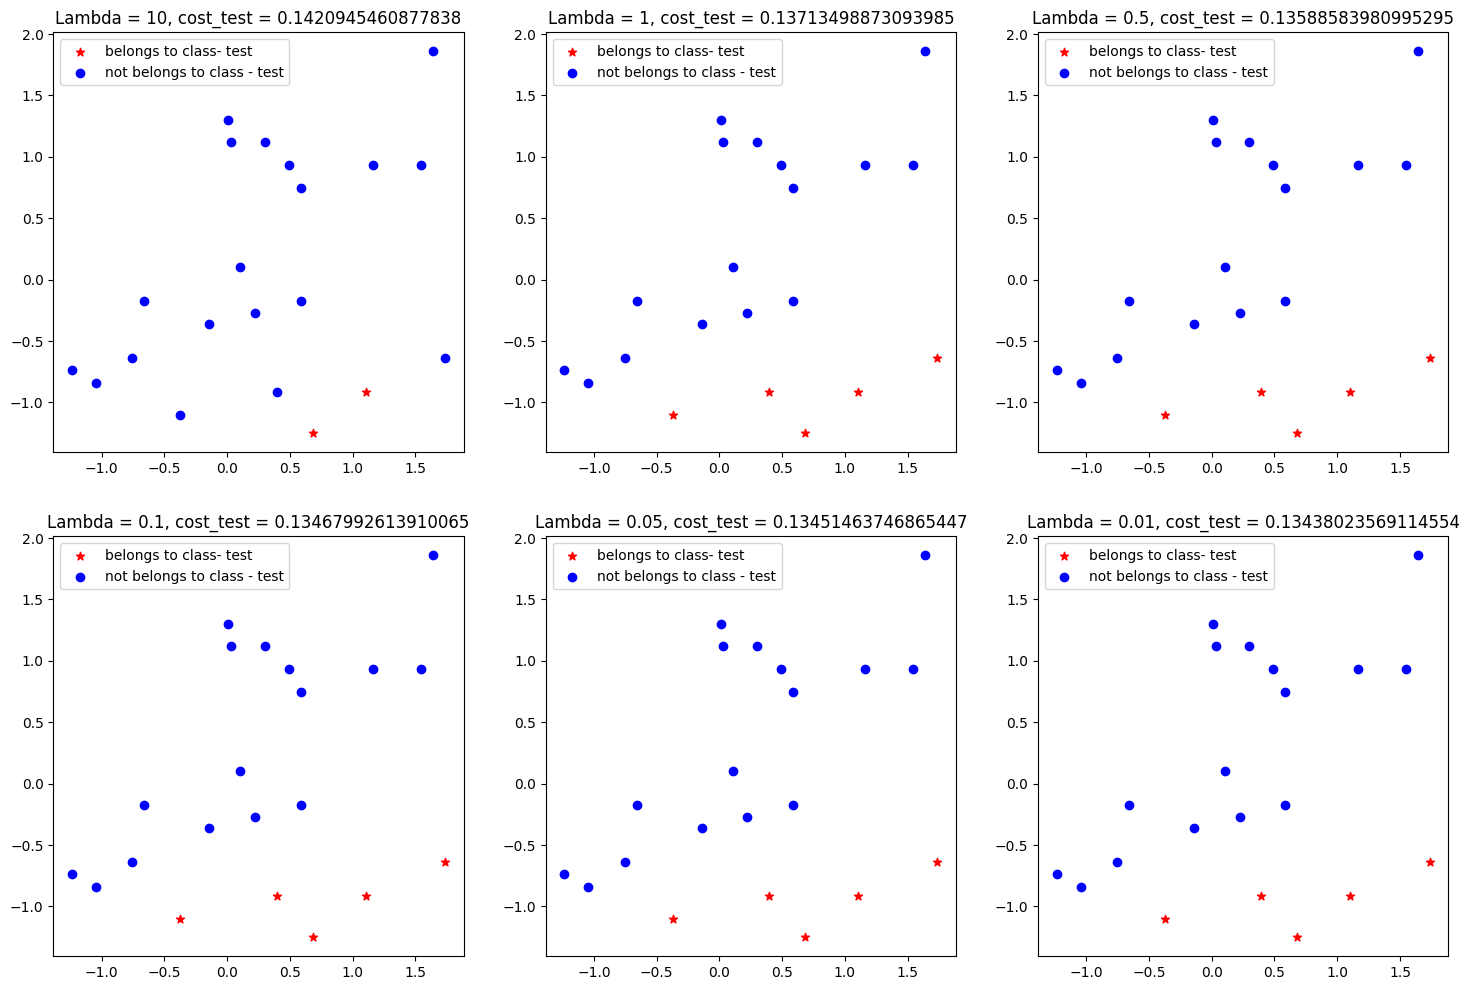

In [19]:
lambdas_ = [10, 1, 0.5, 0.1, 0.05, 0.01]
fig, ax = plt.subplots(2, 3)
fig.set_size_inches((18, 12))

for i in range(6):
    lambda_ = lambdas_[i]
    logi_reg = LogisticRegression(penalty='l2', tol=1e-7, C=1/lambda_)
    logi_reg.fit(X_train, y_train.ravel())

    y_train_predict = logi_reg.predict(X_train)
    y_test_predict = logi_reg.predict(X_test)
    y_train_probab = logi_reg.predict_proba(X_train)
    y_test_probabs = logi_reg.predict_proba(X_test)

    belongs = [[], []]
    not_belongs = [[], []]
    for index in range(y_test_predict.shape[0]):
        if y_test_predict[index] == 1.0:
            belongs[0].append(X_test[index, 1])
            belongs[1].append(X_test[index, 2])
        else:
            not_belongs[0].append(X_test[index, 1])
            not_belongs[1].append(X_test[index, 2])

    ax[int(i / 3), i % 3].scatter(belongs[0], belongs[1], marker='*', color='r')
    ax[int(i / 3), i % 3].scatter(not_belongs[0], not_belongs[1], marker='o', color='b')
    ax[int(i / 3), i % 3].legend(["belongs to class- test", "not belongs to class - test"])
    ax[int(i / 3), i % 3].set_title(f"Lambda = {lambda_}, cost_test = {calculate_cost2(X_test.T, y_test.T, logi_reg.coef_.T, lambda_)}")

plt.show()

### Dataset - IRIS

In [20]:
data = load_iris()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=19)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
cls_r = classification_report(y_test, y_test_pred)

print(f"Bez regularyzacji, bez cech wielomianowych, koszt na zbiorze uczącym wyniosi: {cost_train}, a na zbiorze testowym: {cost_test}")
print(cls_r)

Bez regularyzacji, bez cech wielomianowych, koszt na zbiorze uczącym wyniosi: 0.04749778232342688, a na zbiorze testowym: 0.04251473381762928
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [21]:
poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test)

log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
cls_r = classification_report(y_test, y_test_pred)

print(f"Bez regularyzacji, koszt na zbiorze uczącym wyniosi: {cost_train}, a na zbiorze testowym: {cost_test}")
print(cls_r)

Bez regularyzacji, koszt na zbiorze uczącym wyniosi: 3.662534888139812e-06, a na zbiorze testowym: 1.803444852859933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [22]:
log_regr = LogisticRegression(penalty="l1", solver='liblinear', C = 0.95)
log_regr.fit(x_train, y_train)

y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
cls_r = classification_report(y_test, y_test_pred)

print(f"Dla regularyzacji l1 oraz C = {0.95}, koszt na zbiorze uczącym wyniosi: {cost_train}, a na zbiorze testowym: {cost_test}")
print(cls_r)

Dla regularyzacji l1 oraz C = 0.95, koszt na zbiorze uczącym wyniosi: 0.10761575455083956, a na zbiorze testowym: 0.25406790392646333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Dataset - digits

In [23]:
data = load_digits()
y = data['target']
x = data['data']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=19)

standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

poly_features = PolynomialFeatures(degree=2)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test)

log_regr = LogisticRegression(penalty='l2', solver='saga', C=1, max_iter=1000)
log_regr.fit(x_train, y_train)

y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)

cls_r = classification_report(y_test, y_test_pred)
print(cls_r)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.88      1.00      0.93        50
           2       1.00      0.96      0.98        52
           3       0.96      0.93      0.95        59
           4       1.00      0.98      0.99        53
           5       0.95      0.97      0.96        61
           6       0.98      0.96      0.97        54
           7       0.95      1.00      0.98        60
           8       0.93      0.88      0.90        48
           9       0.94      0.91      0.93        56

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



C:\Users\Bartlomiej\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
